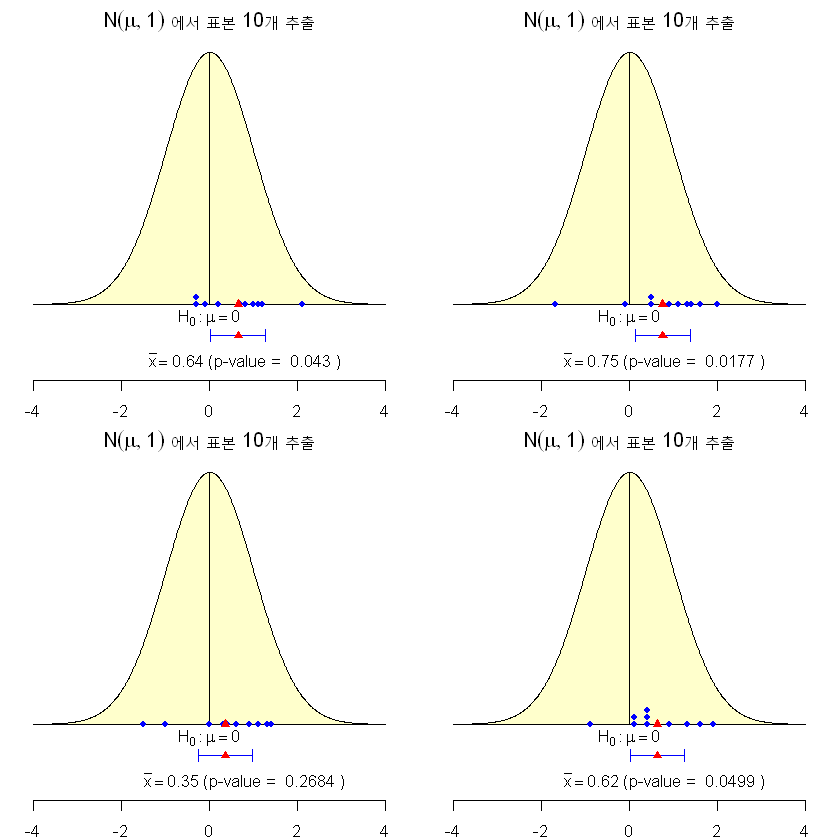

In [4]:
library(tidyverse)

set.seed(1)

fly_scale = 0.1

# 모집단의 그래프를 그리기 위해 좌표를 결정합니다.
graph_x = seq(-4, 4, 0.01) # 모집단의 x좌표
graph_y = dnorm(graph_x, mean = 0, sd = 1) + fly_scale # 모집단의 y좌표

par(mfrow = c(2,2), mar = c(2,1,2,1))

for (none in 1:4){
    plot(graph_x, graph_y, type = 'l',
         main = bquote(N(mu, 1) ~ '에서 표본 10개 추출'),
         frame.plot = FALSE, # 그래프를 둘러싼 사각형 제거합니다.
         xlim = c(-4, 4),
         ylim = c(0, max(graph_y)),
         yaxt = 'n', # y축 눈금 제거합니다.
         xlab = '', ylab = '')
    
    polygon(graph_x, graph_y, col = '#FFFFCC') # 그래프를 색칠합니다.
    lines(c(0,0), range(graph_y))
    
    # 표본 생성 및 시각화
    ten_sample = rnorm(10, mean = 0.5, sd = 1) %>% round(1)
    stripchart(ten_sample, method = 'stack', pch = 16, col = 'blue', add = TRUE, at = min(graph_y)) # 표본을 점도표로 시각화합니다.
    points(mean(ten_sample), 0.1, pch = 17, col = 'red') # 표본평균은 빨간 삼각형으로 표시합니다.
    text(0, 0.08, bquote(H[0] : mu == 0))
    
    alpha = 0.05 # 유의수준은 0.05입니다.
    # 모평균은 모른다고 가정하고 진행합니다.
    # 단, 모표준편차가 1임을 안다고 가정하므로 t-분포로 근사하지 않고 z_score를 사용합니다.
    # 신뢰구간 : 표본평균 +- z_score * population_stdev / sample_size
    z_score = qnorm(1-alpha/2)
    confidence_interval = c(mean(ten_sample) - z_score * 1 / sqrt(10),
                            mean(ten_sample) + z_score * 1 / sqrt(10))
    
    # 95% 신뢰구간을 시각화하고 그 위에 표본 평균을 빨간색 점으로 표시합니다.
    arrows(confidence_interval[1], 0.05, 
           confidence_interval[2], 0.05, 
           angle = 90, code = 3, length = 0.05, col = 'blue')
    
    points(mean(ten_sample), 0.05, pch = 17, col = 'red')
    
    # 가설검정
    # Under H_0
    # (표본평균 - 영가설의 모수) / (모표준편차 / 표본크기)를 z값으로 하고 이것이 모집단에서 얼마나 희귀한 값인지 확인
    # 양측검정이므로 2를 곱합니다.
    p_value = (2*(1-pnorm(  (mean(ten_sample) - 0) / (1/sqrt(10))  ))) %>% round(4) 
    
    text(0.8, 0.01, labels = bquote(bar(x) == .(mean(ten_sample)) ~'(p-value = ' ~ .(p_value) ~')'))
}